 #  Previsão de Demanda com Regressão Linear

## Introdução

A previsão linear de demanda é uma das ferramentas mais estratégicas no contexto da gestão empresarial moderna, sendo fundamental para o planejamento de produção, controle de estoque, logística e estratégias de marketing. Empresas que conseguem antecipar suas vendas com precisão não apenas reduzem custos com excesso ou falta de produtos, como também aumentam a satisfação dos clientes, otimizando seus recursos de forma mais inteligente e eficaz.

Neste projeto, serão utilizados os conceitos de **regressão linear** para construir um modelo preditivo voltado à previsão das vendas mensais de pranchas de surf da loja fictícia *Wave Surfboards*. O desafio consiste em utilizar dados históricos, incluindo as temperaturas médias mensais e os investimentos mensais em campanhas de marketing, como variáveis independentes para prever o número de pranchas vendidas em cada mês.

Este estudo prático será desenvolvido utilizando a linguagem **Python** e algumas das principais bibliotecas para análise de dados e modelagem estatística, como:

- **NumPy**, para manipulação eficiente de arrays numéricos  
- **Pandas**, para organização, limpeza e análise exploratória dos dados  
- **Matplotlib**, para visualização gráfica das relações entre variáveis  
- **Scikit-Learn**, para a construção e avaliação do modelo de regressão linear

Através da análise desses dados e da aplicação da regressão linear múltipla, espera-se identificar relações que expliquem como fatores externos, como clima e esforços de marketing, influenciam diretamente o comportamento de compra dos clientes. O modelo gerado ao final do projeto deverá permitir à empresa simular diferentes cenários futuros e tomar decisões mais embasadas, fortalecendo sua capacidade de atuação no mercado.

Além de resolver um problema prático, este projeto também representa uma oportunidade de aplicar na prática os conhecimentos adquiridos na disciplina **Applied Math for Data Science**, consolidando a compreensão sobre modelagem estatística e análise preditiva.


##Preparação do Ambiente

Nesta estapa, serão importadas as bibliotecas essenciais para análise, manipulação de dados, visualização gráfica e construção do modelo de regressão linear. As bibliotecas utilizadas são ampleamente conhecidas e utilizadas na ciência de dados com Python: NumPy, Pandas, Matplotlib, Scikit-Learn e SciPy.


In [8]:
# Importantando as bibliotecas necessárias no projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline


##Carregamento e Exploração dos Dados

Agora serão inseridos os dados de vendas mensais de pranchas de surf, temperaturas médias mensais e valores investidos em campanhas de marketing. Esses dados serão organizados em um DataFrame com a biblioteca Pandas. Em seguida, será feita uma análise descritiva para entender as principais catcterísticas dos dados e verificar possíveis padrões e correlações.

In [9]:
vendas_mensais = [120, 135, 150, 160, 145, 155, 170, 180, 175, 165, 155, 160]
temperaturas_medias = [25.0, 26.5, 28.0, 29.5, 27.0, 26.0, 25.5, 24.0, 23.5, 22.0, 21.5, 22.5]
investimento_marketing = [5000, 5500, 6000, 6500, 6200, 5800, 6300, 6700, 6400, 6100, 5900, 6000]

df = pd.DataFrame({
    'Vendas' : vendas_mensais,
    'Temperatura' : temperaturas_medias,
    'Marketing' : investimento_marketing
})

print("Visualização inicial dos dados:")
display(df.head())

print("\nResumo estatístico dos dados:")
display(df.describe())

Visualização inicial dos dados:


,Vendas,Temperatura,Marketing
0,120,25.0,5000
1,135,26.5,5500
2,150,28.0,6000
3,160,29.5,6500
4,145,27.0,6200



Resumo estatístico dos dados:


,Vendas,Temperatura,Marketing
count,12.000000,12.000000,12.000000
mean,155.833333,25.083333,6033.333333
std,16.899883,2.475639,459.907764
min,120.000000,21.500000,5000.000000
25%,148.750000,23.250000,5875.000000
50%,157.500000,25.250000,6050.000000
75%,166.250000,26.625000,6325.000000
max,180.000000,29.500000,6700.000000


##Visualização Gráfica dos Dados

A viasualização gráfica é uma etapa fundamental na análise de dados, pois identificar padrões, tendências e possíveis correlações entre variáveis. A seguir serão apresentados gráficos de dispersão (scatter plots) para observar as relações entre:

- Temperatura e vendas
- Investimentos em marketing e vendas

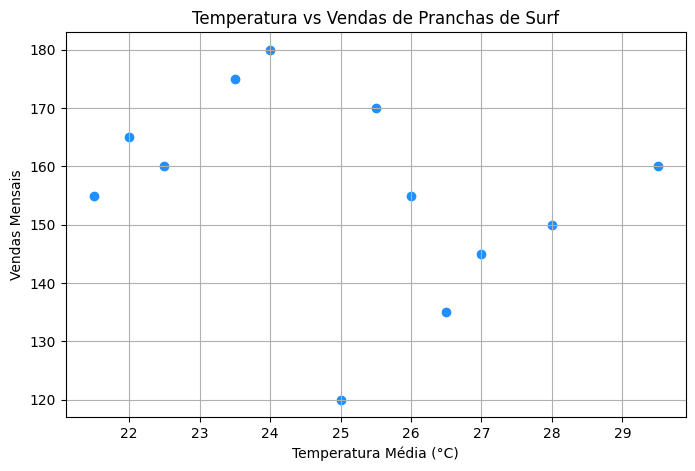

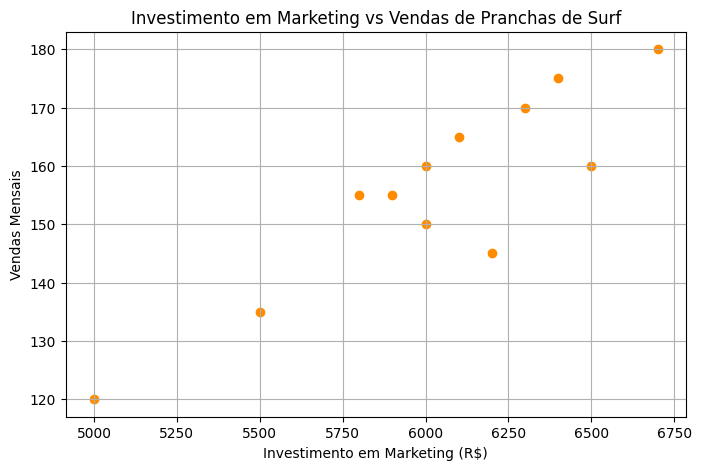

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Temperatura'], df['Vendas'], color='dodgerblue')
plt.title('Temperatura vs Vendas de Pranchas de Surf')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Vendas Mensais')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df['Marketing'], df['Vendas'], color='darkorange')
plt.title('Investimento em Marketing vs Vendas de Pranchas de Surf')
plt.xlabel('Investimento em Marketing (R$)')
plt.ylabel('Vendas Mensais')
plt.grid(True)
plt.show()

##Criação do Modelo de Regressão Linear

Nesta etapa, será criado um modelo de regressão linear utilizando a biblioteca Scikit-Learn.O modelo será treinado com as variáveis independentes (temperatura média e investimento em marketing) para prever a variável dependente (vendas mensais).
A proposta é treinar o modelo com base nos dados históricos e identificar como essas variáveis influenciam diretamente no comportamento de compra. O objetivo é compreender o impacto que essas varáveis exercem sobre as vendas e, a partir disso, utilizar o modelo para gerar previsões com base em novos dados.


In [11]:
x = df[['Temperatura', 'Marketing']]
y = df['Vendas']

modelo = LinearRegression()

modelo.fit(x,y)

print("Coeficientes (Temperatura e Marketing):", modelo.coef_)
print("Intercepto:", modelo.intercept_)

y_pred = modelo.predict(x)

df['Vendas_Previstas'] = y_pred

display(df.head())

Coeficientes (Temperatura e Marketing): [-2.25753559  0.03328622]
Intercepto: 11.632994750907613


,Vendas,Temperatura,Marketing,Vendas_Previstas
0,120,25.0,5000,121.625701
1,135,26.5,5500,134.882508
2,150,28.0,6000,148.139314
3,160,29.5,6500,161.396120
4,145,27.0,6200,157.054093


##Avaliação do Modelo

Com o modelo de regressão treinado, agora é hora de avaliar se as previsões estão realmente próximas dos valores reais. Para isso, e utilizado algumas métricas comuns na análise de modelos preditivos, como:

- **MAE (Erro Médio Absoluto)**: mostra em média, o quanto o modelo erra nas previsões.
- **MSE (Erro Quadrático Médio)**: penaliza erros maiores e ajuda a identificar distorções.
- **R² (Coeficiente de Determinação)**: indica o quanto o modelo consegue explicar os resultados com base nas variáveis usadas.

Essas métricas ajuda a entender a qualidade do modelo e se ele faz previsões confiáveis.

In [12]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MAE (Erro Médio Absoluto):", round(mae, 2))
print("MSE (Erro Quadrático Médio):", round(mse, 2))
print("R² (Coeficiente de Determinação):", round(r2, 4))

MAE (Erro Médio Absoluto): 3.43
MSE (Erro Quadrático Médio): 25.45
R² (Coeficiente de Determinação): 0.9028


## Análise dos Resultados

Com base nas métricas apresentadas, podemos observar que o modelo conseguiu gerar previsões com um bom nível de precisão. O valor de R² mostra que uma boa parte da variação nas vendas foi explicada pelas variáveis temperatura e marketing. Já os valores de MAE e MSE indicam que, em média, o erro nas previsões não foi alto, o que torna o modelo útil para apoiar decisões da empresa, como planejamento de campanhas e controle de estoque.

##Conclusão e Melhorias

Com a construção e avaliação do modelo de Regressão Linear, foi possível prever as vendas mensais da loja com base em duas variáveis relevantes: temperatura média e investomento em marketing. Os resultados mostram uma boa relação entre essas variáveis e as vendas, com um nível de erro aceitável e um coeficiente R² indicando que o modelo consegue explicar boa parte do comportamento dos dados.
Apesar disso, o modelo pode ser aprimorado. Uma das melhorias seria incluir outras variáveis que também influencia nas vendas, como promoções sazonais, das úteis no mês, ou até indicadores econômicos, Além disso, utilizar mais dados históricos ou técnicas mais avançadas de regressão (como modelos não lineares ou regressão regularizada) pode aumentar a precisão.
Mesmo sendo um modelo simples, os resultados obtidos já oferecem valor prático, ajudando a empresa a tomar decisôes mais seguras no planejamento de ações e controle de estoque.